In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import sys
sys.path.insert(0, '../..')

from src.keypoint import keypoint, utils, sift

In [2]:
SIFT_WIDTH = 9

## Using SIFT Algorithm to Correlate Key Points

#### Perspective 1

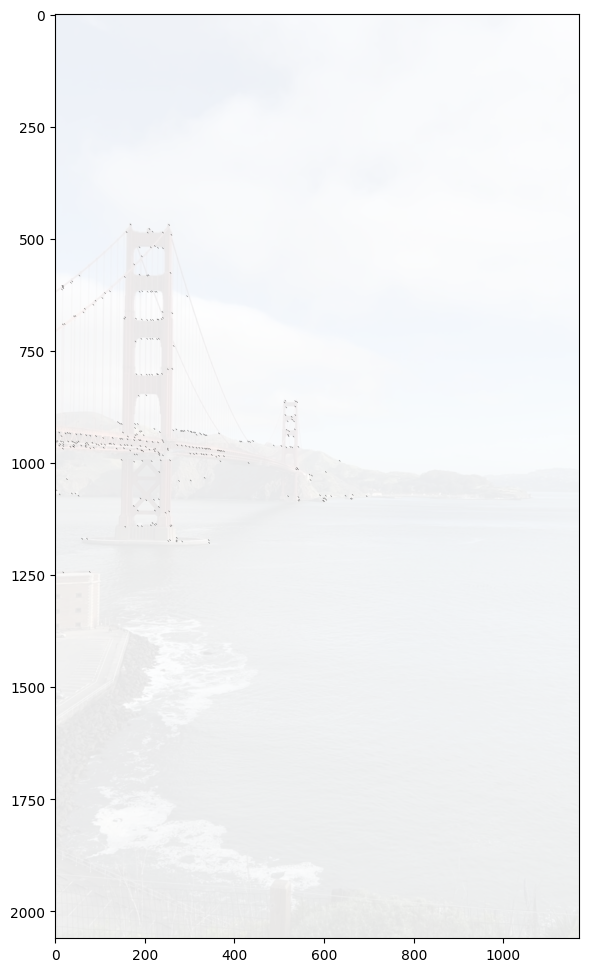

In [ ]:
image1 = Image.open('../../images/bridge/bridge3.jpg')
intensity1 = utils.rgb_to_intensity('../../images/bridge/bridge3.jpg')
corner_scores1 = keypoint.corner_finder(
    intensity1, 
    smoothing_variance=1.0,
)
thresholded_corner_scores1 = np.where(corner_scores1 > 2.5E7, 1, 0)
cleaned_thresholded_corners1 = utils.clean_image(thresholded_corner_scores1)

# filter keypoints located away from the bridge
keypoints1 = np.argwhere(cleaned_thresholded_corners1[400:1250,:700] > 0)
keypoints1 += np.array([400, 0])

highlight_keypoints1 = np.zeros(intensity1.shape)
for p in keypoints1:
    for i in range(-1, 2):
        highlight_keypoints1[p[0]+i, p[1]+i] = 1


plt.figure(figsize=(12, 12))
plt.imshow(highlight_keypoints1, cmap='binary')
plt.imshow(image1, alpha=0.1)
plt.show()

#### Perspective 2

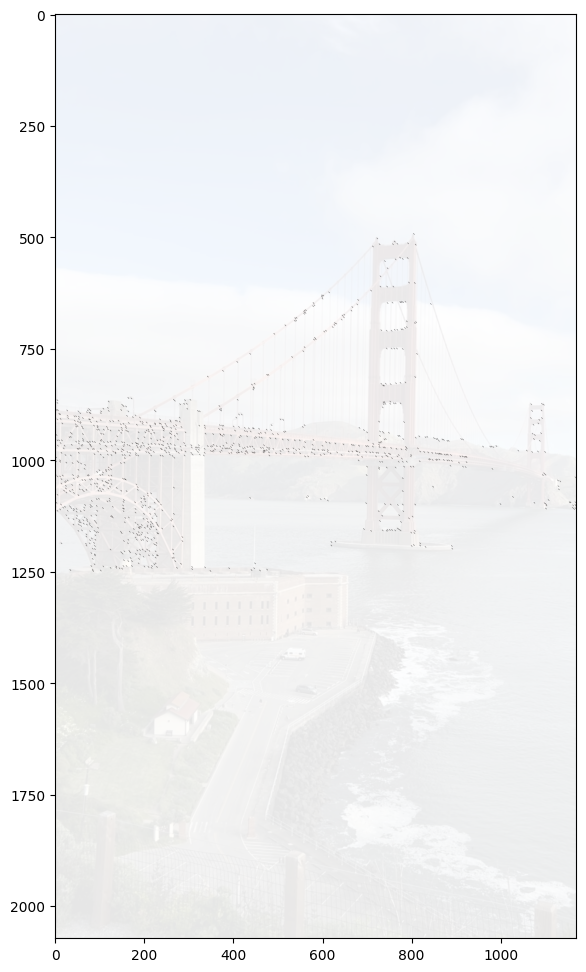

In [ ]:
image2 = Image.open('../../images/bridge/bridge4.jpg')
intensity2 = utils.rgb_to_intensity('../../images/bridge/bridge4.jpg')
corner_scores2 = keypoint.corner_finder(
    intensity2, 
    smoothing_variance=1.0,
)
thresholded_corner_scores2 = np.where(corner_scores2 > 2.5E7, 1, 0)
cleaned_thresholded_corners2 = utils.clean_image(thresholded_corner_scores2)

# filter keypoints located away from the bridge
keypoints2 = np.argwhere(cleaned_thresholded_corners2[300:1250,:])
keypoints2 += np.array([300, 0])

highlight_keypoints2 = np.zeros(intensity2.shape)
for p in keypoints2:
    for i in range(-1, 2):
        highlight_keypoints2[p[0]+i, p[1]+i] = 1

plt.figure(figsize=(12, 12))
plt.imshow(highlight_keypoints2, cmap='binary')
plt.imshow(image2, alpha=0.1)
plt.show()

#### Compute SIFT vector for all keypoints in each image

In [6]:
sift1 = []
for p in keypoints1:
    # Ignore keypoints near the image boundary
    min_x, min_y = SIFT_WIDTH, SIFT_WIDTH
    max_x, max_y = intensity1.shape[0] - SIFT_WIDTH, intensity1.shape[1] - SIFT_WIDTH
    if not (min_x <= p[0] < max_x and min_y <= p[1] < max_y):
        continue
    sift1.append((p, sift.sift(intensity1[p[0]-SIFT_WIDTH:p[0]+SIFT_WIDTH,p[1]-SIFT_WIDTH:p[1]+SIFT_WIDTH])))

sift2 = []
for p in keypoints2:
    # Ignore keypoints near the image boundary
    min_x, min_y = SIFT_WIDTH, SIFT_WIDTH
    max_x, max_y = intensity2.shape[0] - SIFT_WIDTH, intensity2.shape[1] - SIFT_WIDTH
    if not (min_x <= p[0] < max_x and min_y <= p[1] < max_y):
        continue
    sift2.append((p, sift.sift(intensity2[p[0]-SIFT_WIDTH:p[0]+SIFT_WIDTH,p[1]-SIFT_WIDTH:p[1]+SIFT_WIDTH])))

# Identify the keypoint pairs with the most similar SIFT vectors
distances = []
for p1 in sift1:
    for p2 in sift2:
        distances.append((np.linalg.norm(p1[1] - p2[1]), p1, p2))
sorted_distances = sorted(distances, key=lambda x: x[0])

#### Display the 10 most similar keypoint pairs

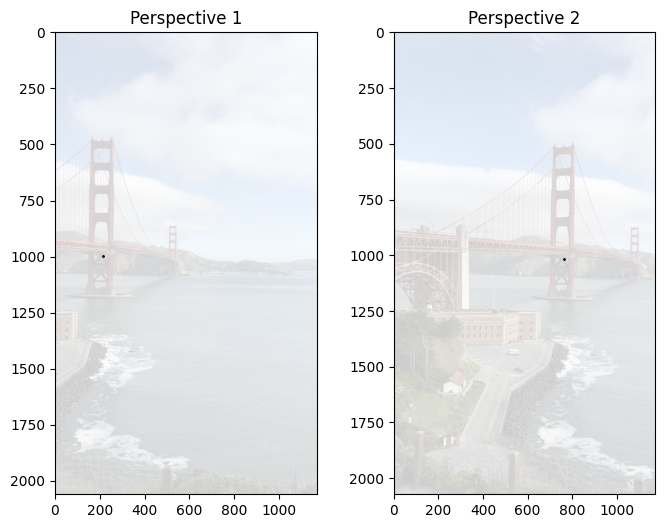

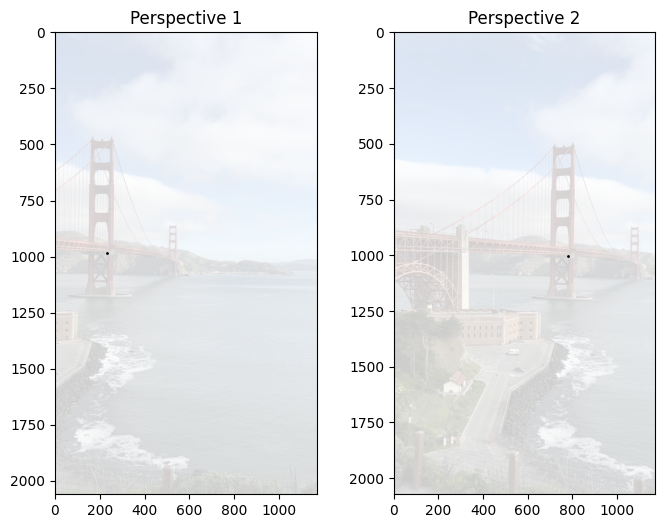

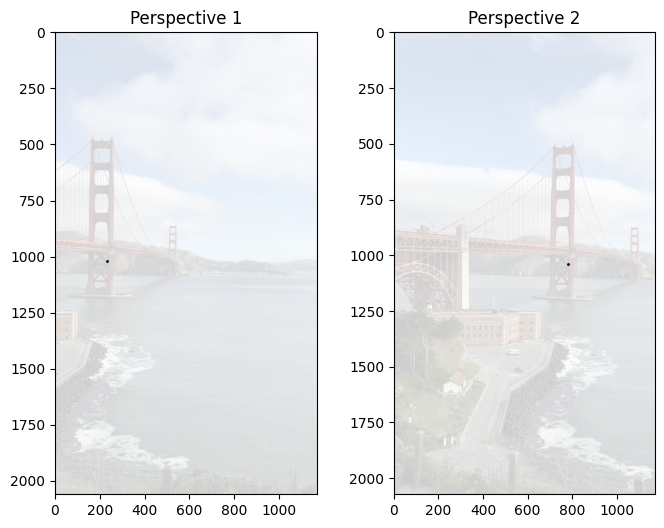

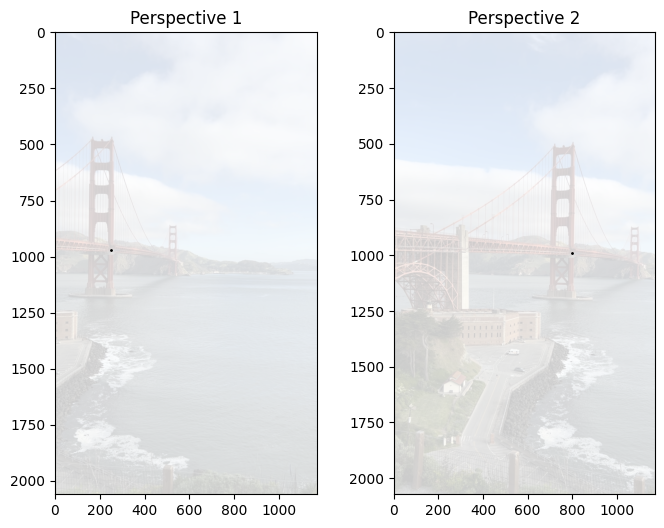

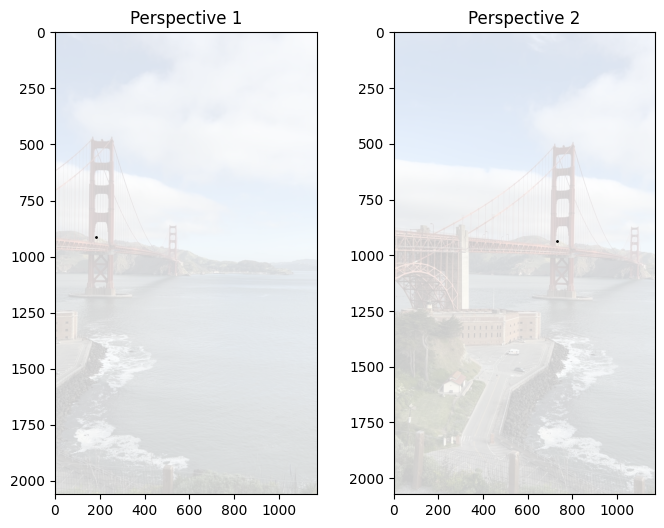

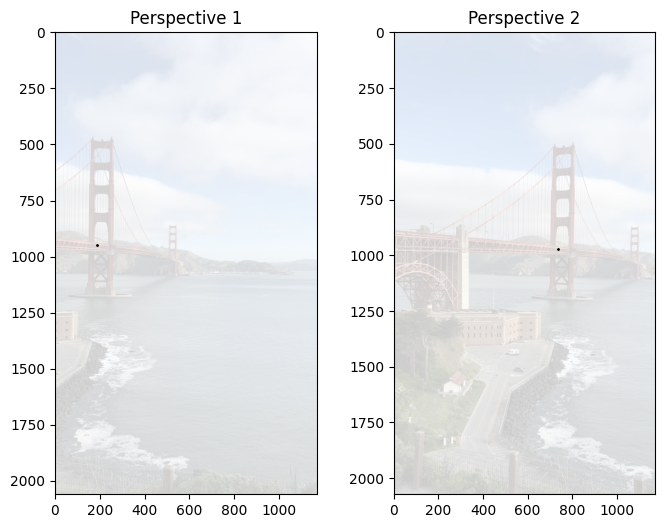

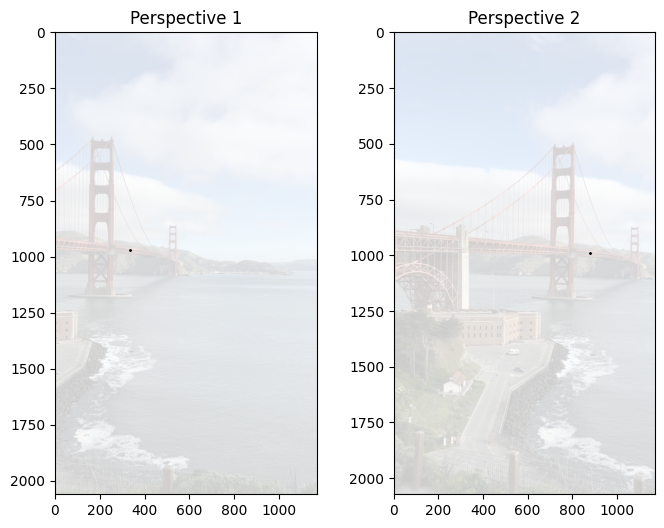

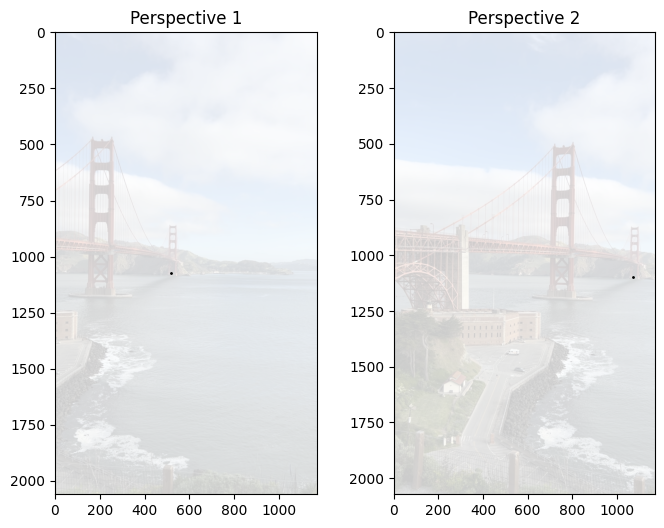

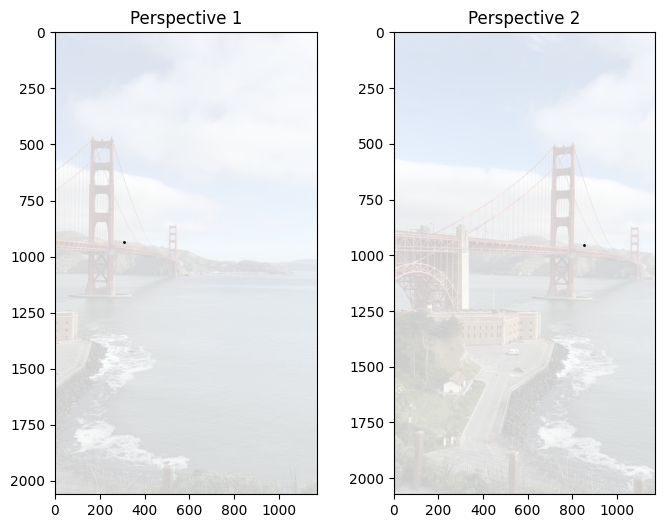

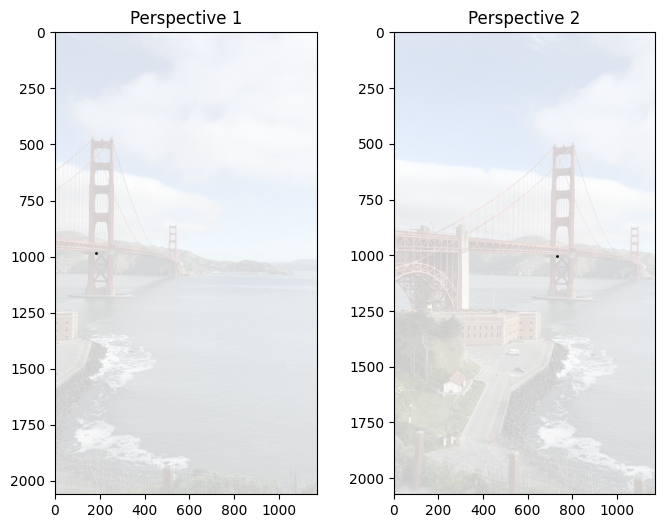

In [8]:
for i in range(10):
    distance_tuple = sorted_distances[i]
    keypoint1 = distance_tuple[1][0]
    keypoint2 = distance_tuple[2][0]

    # Plot images side by side
    fig, axes = plt.subplots(1, 2, figsize=(8, 6))

    # Plot first image with highlight
    axes[0].scatter(keypoint1[1], keypoint1[0], color='k', s=1)
    axes[0].imshow(image1, alpha=0.2)
    axes[0].set_title('Perspective 1')

    # Plot second image with highlight
    axes[1].scatter(keypoint2[1], keypoint2[0], color='k', s=1)
    axes[1].imshow(image2, alpha=0.2)
    axes[1].set_title('Perspective 2')

    plt.show()